gray [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


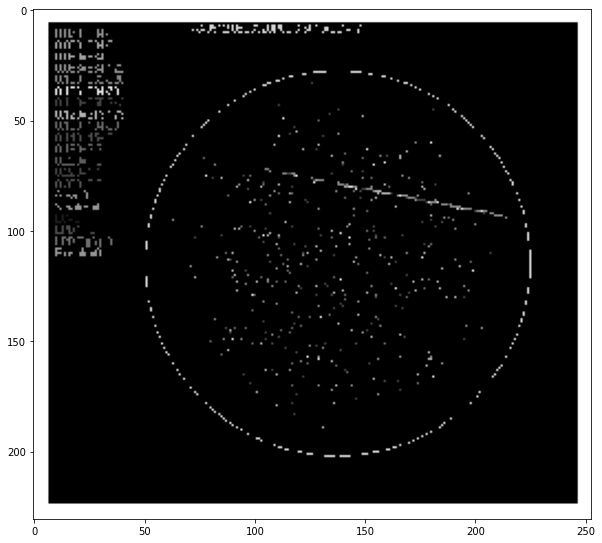

lines [[[  4.           1.553343  ]]

 [[228.           1.553343  ]]

 [[  0.           1.5707964 ]]

 ...

 [[  1.           0.7330383 ]]

 [[340.           0.75049156]]

 [[339.           0.82030475]]]


In [12]:
import cv2
import os
import pandas as pd
import sklearn
import numpy as np
import imageio.v3 as iio
from matplotlib import pyplot as plt
pic = iio.imread(r'C:\Github\repository\image_classification\imgs\image.png') 
# pic = pic[20:210, 48:230, :]
# gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])  
gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
print("gray",gray)
# gray = gray(pic) 
plt.figure( figsize = (10,10))
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray')) 
plt.show()
rho = 1
theta = np.pi/180
lines = cv2.HoughLines(gray, rho, theta, 0, 0, 0, np.pi) 
print('lines',lines)
# plt.figure( figsize = (10,10))
# plt.imshow(lines, cmap = plt.get_cmap(name = 'gray')) 
# plt.show()

In [52]:
import cv2
import numpy as np
import math

image1 = cv2.imread(r'C:\Github\repository\image_classification\imgs\image.png')
image1 = image1[20:210, 48:230, :]

gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
dst = cv2.Canny(gray, 50, 200)

lines= cv2.HoughLines(dst, 230, math.pi/180.0, 100, 0, 0)
if lines is not None:
    print('len(lines)',len(lines))
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0, y0 = a*rho, b*rho
        pt1 = ( int(x0+1000*(-b)), int(y0+1000*(a)) )
        pt2 = ( int(x0-1000*(-b)), int(y0-1000*(a)) )
        print('pt1',pt1,'pt2',pt2)
        cv2.line(image1, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

cv2.startWindowThread()
cv2.imshow('image1',image1)
cv2.waitKey()
cv2.destroyAllWindows()

len(lines) 4
pt1 (-819, -573) pt2 (819, 573)
pt1 (0, 1000) pt2 (0, -1000)
pt1 (-544, 869) pt2 (869, -544)
pt1 (-603, 829) pt2 (905, -482)
